# Simple ANN to Recognise DIGITs

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

### Load dataset

In [4]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Model
* Input Layer: 784 neurons (since MNIST images are 28x28, flattened)
* Hidden Layer 1: 128 neurons (ReLU activation)
* Hidden Layer 2: 64 neurons (ReLU activation)
* Output Layer: 10 neurons (softmax activation for classification)
* Loss function : multiclass cross entropy

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.architecture = nn.Sequential(
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    
    def forward(self, X):
        X = self.flatten(X)
        logits = self.architecture(X)
        return logits

### Initialize model

In [6]:
model = NeuralNetwork()

lr = 0.0001
epochs = 10
batch_size = 128

optimiser = torch.optim.Adam(params=model.parameters(),lr=lr)
loss_fn = nn.functional.cross_entropy

### Dataset loader

In [7]:
train_dataloader = DataLoader(dataset=training_data,batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,shuffle=True)

### Training

Epoch 1 done!
Epoch 2 done!
Epoch 3 done!
Epoch 4 done!
Epoch 5 done!
Epoch 6 done!
Epoch 7 done!
Epoch 8 done!
Epoch 9 done!
Epoch 10 done!


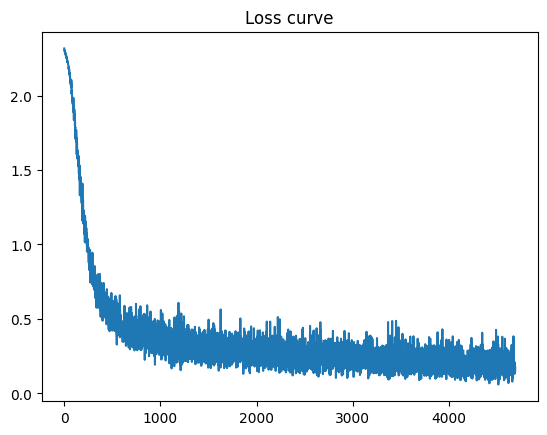

In [8]:
model.train()
training_loss = []
for i in range (epochs):
    print(f"Epoch {i+1} done!")
    for batch, (x,t) in enumerate(train_dataloader):
        y = model(x)
        
        loss = loss_fn(y,t)
        loss.backward()
        
        optimiser.step()
        optimiser.zero_grad()
        
        training_loss.append(loss.item())

# Visualize loss
plt.plot(training_loss)
plt.title("Loss curve")
plt.show()

### Testing model

In [9]:
model.eval()
total_loss = 0.00
with torch.no_grad():
    for x,t in test_dataloader:
        y = model(x)
        loss = loss_fn(y,t)
        total_loss += loss.item()

print(f"Average Loss: {total_loss/len(test_data.data)}")

Average Loss: 0.19137727193133683


### Save model

In [11]:
torch.save(model.state_dict(),"model.pth")

### Let's see some results

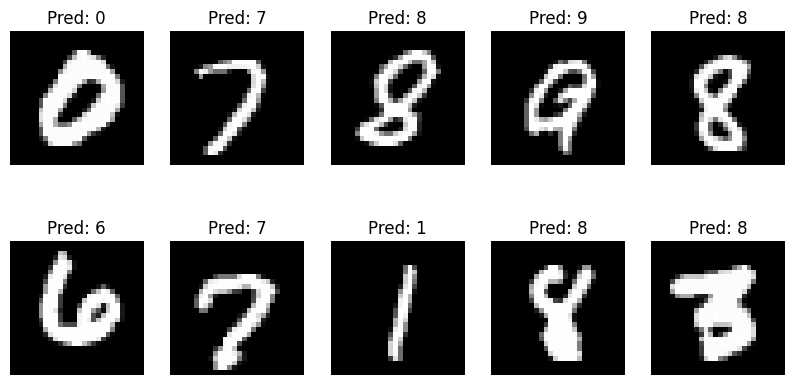

In [ ]:
test_dataloader = DataLoader(test_data, batch_size=10, shuffle=True)
images, labels = next(iter(test_dataloader))  

with torch.no_grad():
    outputs = model(images)
    predictions = outputs.argmax(dim=1) 

# Plot images with predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()

for i in range(10):
    img = images[i].squeeze() 
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(f"Pred: {predictions[i].item()}")
    axes[i].axis("off")

plt.show()